# Assignment

Link for Datasets
(https://drive.google.com/drive/folders/105ftuIwN9kqyPNEEm3E6IM7LqywjyvJa?usp=sharing)

Q21. Write a pandas program to import three datasheets from a given
excel data (coalpublic2013.xlsx ) in to a single dataframe.
 
Note: Structure of three datasheets are same.

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#MULTIPLE DATASHEETS ARE NOT AVAILABLE IN coalpublic2013.xlsx
df1= pd.read_excel('/home/murali/ipynb/Assignment/employee.xlsx', sheet_name=0)
df2= pd.read_excel('/home/murali/ipynb/Assignment/employee.xlsx', sheet_name=1)
df3= pd.read_excel('/home/murali/ipynb/Assignment/employee.xlsx', sheet_name=2)
df=pd.concat([df1,df2,df3])
df.head()

,emp_id,first_name,last_name,hire_date
0,100,Steven,King,2003-06-17
1,101,Neena,Kochhar,2005-09-21
2,102,Lex,De Haan,2001-01-13
3,103,Alexander,Hunold,2006-01-03
4,104,Bruce,Ernst,2007-05-21


Q 22. Write a pandas program to import three datasheets from a given
excel data (employee.xlsx ) into a single data frame and export the
result into new Excel file.
 
Note: Structure of three datasheets are same.

In [96]:
df1= pd.read_excel('/home/murali/ipynb/Assignment/employee.xlsx', sheet_name=0)
df2= pd.read_excel('/home/murali/ipynb/Assignment/employee.xlsx', sheet_name=1)
df3= pd.read_excel('/home/murali/ipynb/Assignment/employee.xlsx', sheet_name=2)
df=pd.concat([df1,df2,df3])
df.to_excel('output.xlsx')
print('successfully exported the result into new Excel file.')

successfully exported the result into new Excel file.


Q23. Write a pandas program to create the Pivot table with multiple
indexes from the data set of the titanic.csv.

In [72]:
df = pd.read_csv('titanic.csv') 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Unnamed: 15
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN


In [73]:
df.drop(df.columns[df.columns.str.contains('Unnamed: 15',case = False)],axis = 1, inplace = True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [74]:
pd.pivot_table(df,index = ["sex","age"], aggfunc=np.sum)

adult_male  alone      fare  parch  pclass  sibsp  survived
sex    age                                                               
female 0.75          0.0    0.0   38.5166      2       6      4         2
       1.00          0.0    0.0   26.8750      3       6      1         2
       2.00          0.0    0.0  259.4750      9      15      9         2
       3.00          0.0    0.0   62.6542      3       5      4         1
       4.00          0.0    0.0  114.1417      6      13      4         5
...                  ...    ...       ...    ...     ...    ...       ...
male   70.00         2.0    1.0   81.5000      1       3      1         0
       70.50         1.0    1.0    7.7500      0       3      0         0
       71.00         2.0    2.0   84.1584      0       2      0         0
       74.00         1.0    1.0    7.7750      0       3      0         0
       80.00         1.0    1.0   30.0000      0       1      0         1

[145 rows x 7 columns]

Q24. Write a Pandas program to create the Pivot table and find survival
rate by gender?

In [75]:
df.pivot_table('survived', index ='sex' , columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Q25. Write a pandas program to make partition each of the passengers
into 4 categories based on their age.
 
Note: Age categories- (0, 10), (10, 30), (30, 60), (60, 80)

In [76]:
age_categories=pd.cut(df['age'], [0, 10, 30, 60, 80])
print(age_categories)

0      (10.0, 30.0]
1      (30.0, 60.0]
2      (10.0, 30.0]
3      (30.0, 60.0]
4      (30.0, 60.0]
           ...     
886    (10.0, 30.0]
887    (10.0, 30.0]
888             NaN
889    (10.0, 30.0]
890    (30.0, 60.0]
Name: age, Length: 891, dtype: category
Categories (4, interval[int64]): [(0, 10] < (10, 30] < (30, 60] < (60, 80]]


Q26. Write a pandas program to create the Pivot table and find survival
rate by the gender, age of the different categories of various
classes.

In [77]:
age_cat=pd.cut(df['age'],[0,35,70])
df.pivot_table('survived', index=['sex', age_cat], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 35]   0.957447  0.944444  0.505747
       (35, 70]  0.973684  0.850000  0.200000
male   (0, 35]   0.542857  0.188406  0.170732
       (35, 70]  0.317460  0.066667  0.065217

Q27. Write a pandas program to create the Pivot table and calculate
number of women and men were in a particular cabin class.


In [78]:
df.pivot_table('who', index=['sex'], columns=['class'], aggfunc='count')

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


Q28. Write a pandas program to create the Pivot table and separate
the gender according to whether they travelled alone or not to get
the probability of survival


In [81]:
df.pivot_table('survived', index=['sex','alone'], columns='class')

class            First    Second     Third
sex    alone                              
female False  0.966667  0.931818  0.416667
       True   0.970588  0.906250  0.616667
male   False  0.425532  0.277778  0.180723
       True   0.333333  0.097222  0.121212

Q29. Write a pandas program to create the Pivot table and find the
probability of survival by class, gender, solo boarding, and the port
of embarkation.

In [88]:
df.pivot_table('survived', index=['sex','alone'], columns=['class','embarked'])

class            First                   Second                    Third  \
embarked             C    Q         S         C    Q         S         C   
sex    alone                                                               
female False  1.000000  1.0  0.941176  1.000000  NaN  0.923077  0.611111   
       True   0.944444  NaN  1.000000  1.000000  1.0  0.892857  0.800000   
male   False  0.473684  0.0  0.407407  0.166667  NaN  0.300000  0.500000   
       True   0.347826  NaN  0.326923  0.250000  0.0  0.089552  0.151515   

class                             
embarked             Q         S  
sex    alone                      
female False  0.625000  0.327586  
       True   0.760000  0.466667  
male   False  0.100000  0.142857  
       True   0.068966  0.123762

Q30. Write a pandas program to get current date, oldest date and
number of days between Current date and the oldest date of Ufo
dataset.

In [3]:
df=pd.read_csv('ufo.csv')

In [3]:
df.head(100)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes
...,...,...,...,...,...,...,...
95,10/10/1999 21:00,rachel,nv,us,light,10800,3 hours
96,10/10/1999 21:30,humphrey,ne,us,sphere,300,5 min
97,10/10/1999 22:00,dorset (uk/england),NaN,NaN,flash,1,<1 second
98,10/10/1999 22:30,casey key (north end of),fl,NaN,triangle,120,several minutes


In [4]:
df[['date','time']] = df['datetime'].str.split(expand=True)
df['datetime'] = (pd.to_datetime(df.pop('date'), format='%m/%d/%Y') + 
                  pd.to_timedelta(df.pop('time') + ':00'))

In [5]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [10]:
print('Current date:',df.datetime.max())
print('Oldest date:',df.datetime.min())
print('Number of days:', df.datetime.max()- df.datetime.min())

Current date: 2014-05-08 18:45:00
Oldest date: 1906-11-11 00:00:00
Number of days: 39260 days 18:45:00


Q31. Write a pandas program to get all sighting days of the
unidentified flying object (ufo) between 1950-10-10 and 1960-10-
10.

In [13]:
df[(df['datetime'] >= '1950-10-10 00:00:00') & (df['datetime'] <= '1960-10-10 23:59:59')]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min)
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes
520,1952-10-01 03:30:00,fukuoka (japan),NaN,NaN,disk,1200,about 20 mins
521,1952-10-01 12:00:00,kansas city,mo,us,disk,90,90 sec.
...,...,...,...,...,...,...,...
87709,1960-09-05 21:00:00,buffalo,ny,us,oval,180,3 minutes
88146,1958-09-07 19:00:00,arthur,nd,us,unknown,900,5-15 min.
88621,1952-09-09 20:00:00,philadelphia,pa,us,circle,180,3 minutes
88622,1954-09-09 12:30:00,beaumont,tx,us,disk,300,5 minutes


Q32. Write a Pandas program to extract the year, month, day, hour,
minute, second, and weekday from unidentified flying object (UFO)
reporting date.

In [21]:
print('original data:')
df.head(2)

original data:


,datetime,city,state,country,shape,duration (seconds),duration (hours/min)
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs


In [28]:
# the datetime object in the dataset does't have weekdays information
print('Year:')
print()
print('Month:')
print(df.datetime.dt.month.head(2))
print('Day:')
print(df.datetime.dt.day.head(2))
print('Hour:')
print(df.datetime.dt.hour.head(2))
print('Minute:')
print(df.datetime.dt.minute.head(2))
print('Second:')
print(df.datetime.dt.second.head(2))

Year:
0    1949
1    1949
Name: datetime, dtype: int64
Month:
0    10
1    10
Name: datetime, dtype: int64
Day:
0    10
1    10
Name: datetime, dtype: int64
Hour:
0    20
1    21
Name: datetime, dtype: int64
Minute:
0    30
1     0
Name: datetime, dtype: int64
Second:
0    0
1    0
Name: datetime, dtype: int64


Q33. Write a pandas program to count year-country wise frequency of
reporting dates of the unidentified flying object(UFO).


In [41]:
df['year']=pd.DataFrame(set(df.datetime.dt.year))

In [90]:
df.groupby([df.datetime.dt.year, 'country']).size()

datetime  country
1910      us            3
1920      us            1
1925      us            1
1929      us            1
1930      us            1
                     ... 
2014      au           14
          ca           48
          de            3
          gb           22
          us         2119
Length: 287, dtype: int64

Q34. Write a pandas program to get the difference (in days) between
documented date and reporting date of unidentified flying object
(UFO).

In [ ]:
#THERE ARE NO COLUMNS 'DOCUMENTED DATE' AND 'REPORTING DATE' IN THE DATA-SET PROVIDED

Q35. Write a pandas program to generate sequences of fixedfrequency dates and time spans.

In [49]:
print("Yearly frequency:")
dtr = pd.date_range('2010-01-01', periods=20, freq='Y')
print(dtr)
print("Hourly frequency:")
dtr = pd.date_range('2010-01-01', periods=20, freq='H')
print(dtr)

Yearly frequency:
DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
Hourly frequency:
DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               '2010-01-01 10:00:00', '2010-01-01 11:00:00',
               '2010-01-01 12:00:00', '2010-01-01 13:00:00',
               '2010-01-01 14:00:00', '2010-01-01 15:00:00',
               '2010-01-01 16:00:00', '2010-01-01 17:00:00',
       

Q36. Write a pandas program to manipulate and convert date times
with timezone information.

In [71]:
date=df['datetime'][1]
print('\nTime set to timezone: America/Los_Angeles\n')
date1=date.tz_localize('UTC').tz_convert('America/Los_Angeles')
print(date1)
print('\nTime set to timezone: Indian Standard Time\n')
date=date.tz_localize('UTC').tz_convert('Asia/Kolkata')
print(date)


Time set to timezone: America/Los_Angeles

1949-10-10 13:00:00-08:00

Time set to timezone: Indian Standard Time

1949-10-11 02:30:00+05:30


Q37. Write a pandas program to create the graphical analysis of UFO
(unidentified flying object) Sightings year.

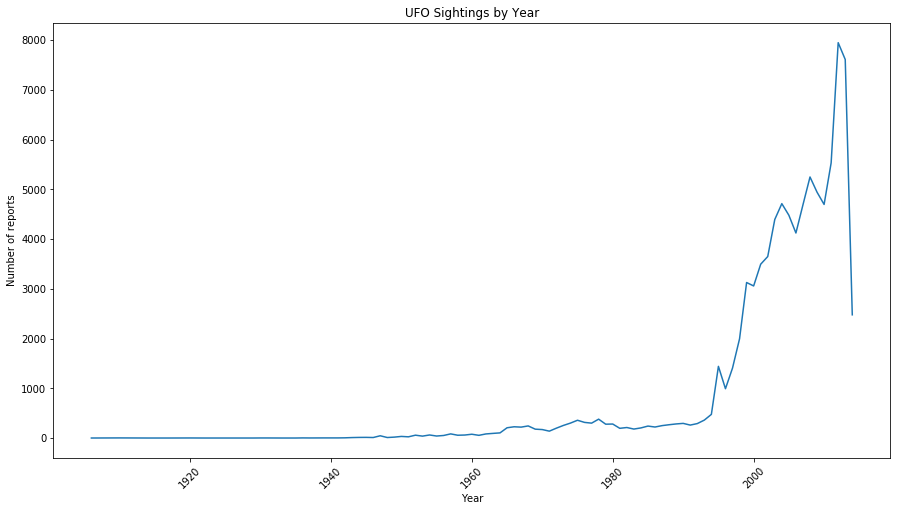

In [94]:
b=df.pivot_table(index=df.datetime.dt.year, aggfunc='size')
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
plt.title('UFO Sightings by Year')
plt.xlabel("Year")
plt.ylabel("Number of reports")
plt.plot(b)

Q38. Write a pandas program to create a comparison of the top 10
years in which the (UFO) was sighted VS each Month.

In [85]:
top_years=df.datetime.dt.year.value_counts().head(10)
print('Top 10 UFO sighted years\n:')
print(top_years)

def is_top_years(year):
    if year in top_years.index:
        return int(year)

month_v_year = df.pivot_table(columns=df.datetime.dt.month, index=df.datetime.dt.year.apply(is_top_years),aggfunc='count',values='city')
month_v_year.columns=month_v_year.columns.astype(int)
month_v_year.index=month_v_year.index.astype(int)
print('\n a comparison of the top 10 years in which the (UFO) was sighted VS each Month\n')
print(month_v_year)

Top 10 UFO sighted years
:
2012    7946
2013    7608
2011    5530
2008    5247
2009    4941
2004    4711
2010    4695
2007    4688
2005    4478
2003    4393
Name: datetime, dtype: int64

 a comparison of the top 10 years in which the (UFO) was sighted VS each Month

datetime   1    2    3    4    5    6    7    8    9    10   11   12
2003      328  266  191  225  251  306  449  542  505  473  470  383
2004      303  300  412  389  387  425  440  545  411  452  329  307
2005      256  279  357  314  300  400  456  352  531  482  465  273
2007      442  264  360  321  311  419  465  468  448  445  372  358
2008      472  369  340  442  343  475  570  502  383  530  453  346
2009      498  394  341  317  359  384  609  499  599  321  322  290
2010      292  186  260  294  328  379  837  527  449  471  361  306
2011      326  275  330  316  318  397  759  634  554  639  444  529
2012      579  388  529  496  513  750  926  886  755  668  773  661
2013      389  281  397  424  524  625  962

Q39. Write a pandas program to create a heatmap (rectangular data as
a colour-encoded matrix) for comparison of top 10 years in
which (UFO ) was sighted VS each Month.


Heatmap for comparison of the top 10 years in which the UFO was sighted vs each month:


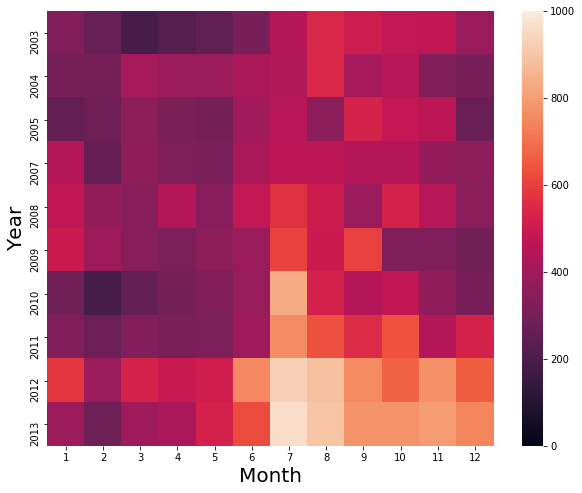

In [90]:
month_v_year.columns=month_v_year.columns.astype(int)
month_v_year.index=month_v_year.index.astype(int)
print("\nHeatmap for comparison of the top 10 years in which the UFO was sighted vs each month:")
plt.figure(figsize=(10,8))
ax = sns.heatmap(month_v_year, vmin=0, vmax=1000)
ax.set_xlabel('Month').set_size(20)
ax.set_ylabel('Year').set_size(20)

Q40. Write a pandas program to create a Timewheel of Hour VS Year
comparison of the top 10 years in which the (UFO) was sighted


Comparison of the top 10 years in which the UFO was sighted vs each month:


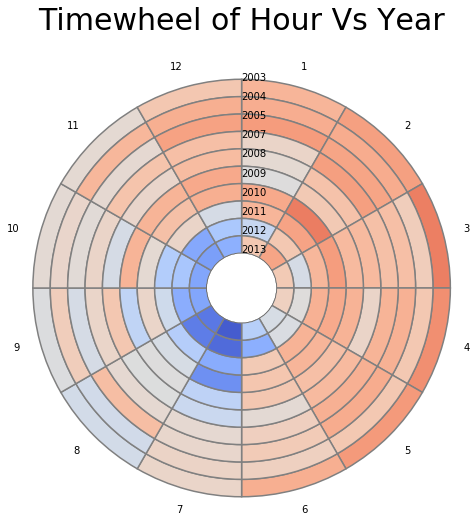

In [94]:
import matplotlib as mpl
import matplotlib.cm as cm
print("\nComparison of the top 10 years in which the UFO was sighted vs each month:")
def pie_heatmap(table, cmap='coolwarm_r', vmin=None, vmax=None,inner_r=0.25, pie_args={}):
   n, m = table.shape
   vmin= table.min().min() if vmin is None else vmin
   vmax= table.max().max() if vmax is None else vmax

   centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
   plt.gcf().gca().add_artist(centre_circle)
   norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
   cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)

   for i, (row_name, row) in enumerate(table.iterrows()):
       labels = None if i > 0 else table.columns
       wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values],
           labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
       plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
       wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
       plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
plt.figure(figsize=(8,8))
plt.title("Timewheel of Hour Vs Year",y=1.08,fontsize=30)
pie_heatmap(month_v_year, vmin=0,vmax=1000,inner_r=0.2)

## Great Job!